In [1]:
# First, we load the libraries we're going to need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 

plt.rcParams['figure.figsize'] = [15, 8] # this is for figure sizes in the next plots

In [2]:
# reading the file from my personal github repository

data = pd.read_csv('https://raw.githubusercontent.com/anakronisme/data-analysis-task/master/ml-faker_random_sample-contracts.csv', sep=",")

In [3]:
#let's take a look at the data

data.head()

,hiring_id,wp_id,hiring_status,wp_status,business_model,company_id,company_name,hiring_created_at,wp_created_at,hiring_starts_on,...,contract_type,gross_wage_amount,gross_wage_time_unit,gross_wage_currency_id,work_period_unit,work_period_amount,work_period_hours,fee_percentage,cancellation_date,is_outsourced
0,166037,1723992,ready_to_work,upcoming,staffing_agency,299204747,Hurst-Garcia,2017-01-12 15:57:41.000000,2017-09-13 09:01:22.000000,2017-01-16,...,full_time,650,hour,EUR,month,2.0,40.0,3.92,NaN,NaN
1,569936,7254150,hiring_closed_out,paid,staffing_agency,237165491,Reese and Sons,2017-02-27 10:27:24.000000,2017-03-19 13:50:52.000000,2017-02-27,...,by_hours,750,hour,GBP,week,12.0,40.0,10.09,NaN,NaN
2,352139,4706480,hiring_closed_out,paid,staffing_agency,168767792,Peterson-Wilson,2017-01-10 17:02:04.000000,2017-01-10 17:23:14.000000,2017-01-10,...,full_time,104166,month,EUR,month,12.0,40.0,5.00,NaN,NaN
3,313527,5362133,hiring_closed_out,paid,independent_contractor,211514331,Eaton LLC,2017-09-07 15:10:16.000000,2018-02-01 16:15:30.000000,2017-09-04,...,full_time,800,hour,GBP,week,12.0,40.0,9.00,NaN,NaN
4,425850,5002046,hiring_closed_out,paid,staffing_agency,146877029,Adams LLC,2017-07-04 08:33:55.000000,2017-07-10 14:50:53.000000,2017-07-10,...,full_time,110568,month,EUR,month,1.6,40.0,0.00,NaN,NaN


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hiring_id               20000 non-null  int64  
 1   wp_id                   20000 non-null  int64  
 2   hiring_status           20000 non-null  object 
 3   wp_status               20000 non-null  object 
 4   business_model          20000 non-null  object 
 5   company_id              20000 non-null  int64  
 6   company_name            20000 non-null  object 
 7   hiring_created_at       20000 non-null  object 
 8   wp_created_at           20000 non-null  object 
 9   hiring_starts_on        20000 non-null  object 
 10  hiring_ends_on          20000 non-null  object 
 11  wp_starts_on            20000 non-null  object 
 12  wp_ends_on              20000 non-null  object 
 13  job_function            20000 non-null  object 
 14  job_country             20000 non-null

In [5]:
# I've detected that some variables are not in the correct format. Let's go to fix that...

data['hiring_starts_on'] = pd.to_datetime(data['hiring_starts_on'], format='%Y-%m-%d')
data['wp_starts_on'] = pd.to_datetime(data['wp_starts_on'], format='%Y-%m-%d')
data['wp_ends_on'] = pd.to_datetime(data['wp_ends_on'], format='%Y-%m-%d')

In [6]:
# Creation of new variables that maybe we need in the future (finally I didn't use it)

data["work_period"] = data["wp_ends_on"]-data["wp_starts_on"]

In [7]:
# Let's see hoy many types of contracts we have. We can assume since there's no more information, that contract 'by_hours' are
# the typical weekend-contracts.

data['contract_type'].unique()

array(['full_time', 'by_hours', 'part_time'], dtype=object)

In [8]:
# This is to test data consistency. We need to have more hirings id's that candidate_id's for example since one candidate can
# concatenate several periods of working but cannot be more people than contracts, for example.

data[['hiring_id', 'candidate_id', 'company_id', 'job_function']].nunique()

hiring_id       9167
candidate_id    7602
company_id       559
job_function      51
dtype: int64

In [12]:
# We've found that there's some errors (a priori) in the data. We can see that there is total gross in negative, as well as 
# negative cantities in est_total_gross and work_period_amount. It is weird that we have negative numbers on these variables so
# we're going to clean this rows by filtering

data.describe(include=["int64", "float64"])

,hiring_id,wp_id,company_id,candidate_id,total_gross,est_total_gross,gross_wage_amount,work_period_amount,work_period_hours,fee_percentage,is_outsourced
count,20000.00000,2.000000e+04,2.000000e+04,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,0.0
mean,456630.85665,3.990264e+06,2.656649e+08,5.543276e+07,756.938708,888.690102,60285.920250,10.617265,34.967625,6.144847,NaN
std,268617.71619,2.302823e+06,1.435120e+08,6.939829e+06,835.168528,2351.382327,69063.749557,10.231662,10.193625,3.720692,NaN
min,3.00000,7.420000e+02,2.641165e+06,4.460000e+03,-383.500000,-549.980357,500.000000,-9.200000,1.000000,0.000000,NaN
25%,220276.00000,1.990110e+06,1.751219e+08,5.723694e+07,309.797500,390.840322,800.000000,3.000000,35.000000,2.810000,NaN
50%,449379.00000,3.992128e+06,2.115143e+08,5.767696e+07,618.250000,513.333333,1092.000000,12.000000,40.000000,6.000000,NaN
75%,696250.50000,5.995242e+06,3.575021e+08,5.779560e+07,1143.050000,1127.000000,116950.000000,12.000000,40.000000,9.000000,NaN
max,921511.00000,7.981365e+06,5.581467e+08,5.794367e+07,36322.707810,37880.447730,500000.000000,72.900000,60.000000,43.300000,NaN


In [13]:
data = data[(data["total_gross"] > 0) & (data["est_total_gross"] > 0) & (data["work_period_amount"] > 0)]

In [83]:
# Question: Which are the job_function and companies that required to work most on the weekend? Let's see.

companies_most_byhours = data[(data["contract_type"].str.contains("by_hours"))]

In [86]:
# Since there's not any column with the exact calendar days the worker has worked. We need to assume that the weekends contracts
# are those by hours. These are the companies with more contracts by hours:

companies_most_byhours["company_name"].value_counts()

Porter, Romero and Stewart    429
Rivera, Henry and Tran        387
Hall Group                    251
Mcbride-Woods                 119
Yates, Mayo and Russell        77
                             ... 
Brewer-Davis                    1
Bryan Ltd                       1
White Ltd                       1
Watkins-Miller                  1
Brooks Ltd                      1
Name: company_name, Length: 142, dtype: int64

In [87]:
# These are the typical 'by_hours' jobs:

companies_most_byhours["job_function"].value_counts()

restaurant-hotel-guy    736
minister                328
annoying-guy            281
drop-guy                206
buzz-guy                 95
ware-man                 70
chef                     66
ads-guy                  54
knowledge-guy            46
carwasher                37
noise-guy                26
store-noise-guy          23
editor                   21
event-guy                19
constructor              15
testing-guy              14
support-guy              12
happy-guy                11
f1-guy                    7
pasta-guy                 4
buddy-guy                 4
dude-guy                  3
tech-art-guy              3
chain-guy                 3
caller                    2
green-guy                 2
tesla-guy                 2
top-guy                   2
people-guy                1
lang-guy                  1
tech-guy                  1
art-guy                   1
Name: job_function, dtype: int64

In [14]:
# Question: Could you find patterns for the cancelled contracts?

data_subset = data[data["cancellation_date"].notnull()] # filtering the subset of data we need

In [15]:
# We can see something quite evident here, 4895 from the total of 4934 cancellations come from staffing_agency. This business
# model agglutinates the 99% of hiring_cancellations.

data_subset.describe(include=["object"])

,hiring_status,wp_status,business_model,company_name,hiring_created_at,wp_created_at,hiring_ends_on,job_function,job_country,candidate_name,currency,contract_type,gross_wage_time_unit,gross_wage_currency_id,work_period_unit,cancellation_date
count,4934,4934,4934,4934,4934,4934,4934,4934,4934,4934,4934,4934,4934,4934,4934,4934
unique,3,6,2,337,3229,3670,677,43,2,2904,2,3,3,2,4,477
top,hiring_cancelled,paid,staffing_agency,Gonzalez PLC,2017-01-25 10:29:04.000000,2017-02-16 17:56:25.000000,2017-08-27,f1-guy,ES,Stephanie Snyder,EUR,full_time,month,EUR,month,2017-11-30
freq,4789,4165,4895,740,16,7,123,2366,4490,16,4490,3867,3234,4490,4441,382


In [21]:
# dates manipulation to get one column with year + month without the day

data['year'] = pd.DatetimeIndex(data['hiring_starts_on']).year
data['month'] = pd.DatetimeIndex(data['hiring_starts_on']).month

In [22]:
data['dateInt']=data['year'].astype(str) + data['month'].astype(str).str.zfill(2)

In [23]:
# Since we have differents currencies, we've created one column with all the cantities in EUR called: total_gross_abs 
# (GBP is 1.18 EUR) in 7 august, 2021

data["total_gross_abs"] = np.where(data['gross_wage_currency_id'] == 'EUR',data["total_gross"] , data["total_gross"]*1.18)

In [24]:
data[["total_gross", "gross_wage_currency_id", "total_gross_abs"]]

,total_gross,gross_wage_currency_id,total_gross_abs
0,1114.285714,EUR,1114.285714
1,346.970000,GBP,409.424600
2,1061.660000,EUR,1061.660000
3,455.000000,GBP,536.900000
4,664.280000,EUR,664.280000
...,...,...,...
19995,1062.000000,EUR,1062.000000
19996,390.840322,GBP,461.191580
19997,582.000000,GBP,686.760000
19998,1292.930000,EUR,1292.930000


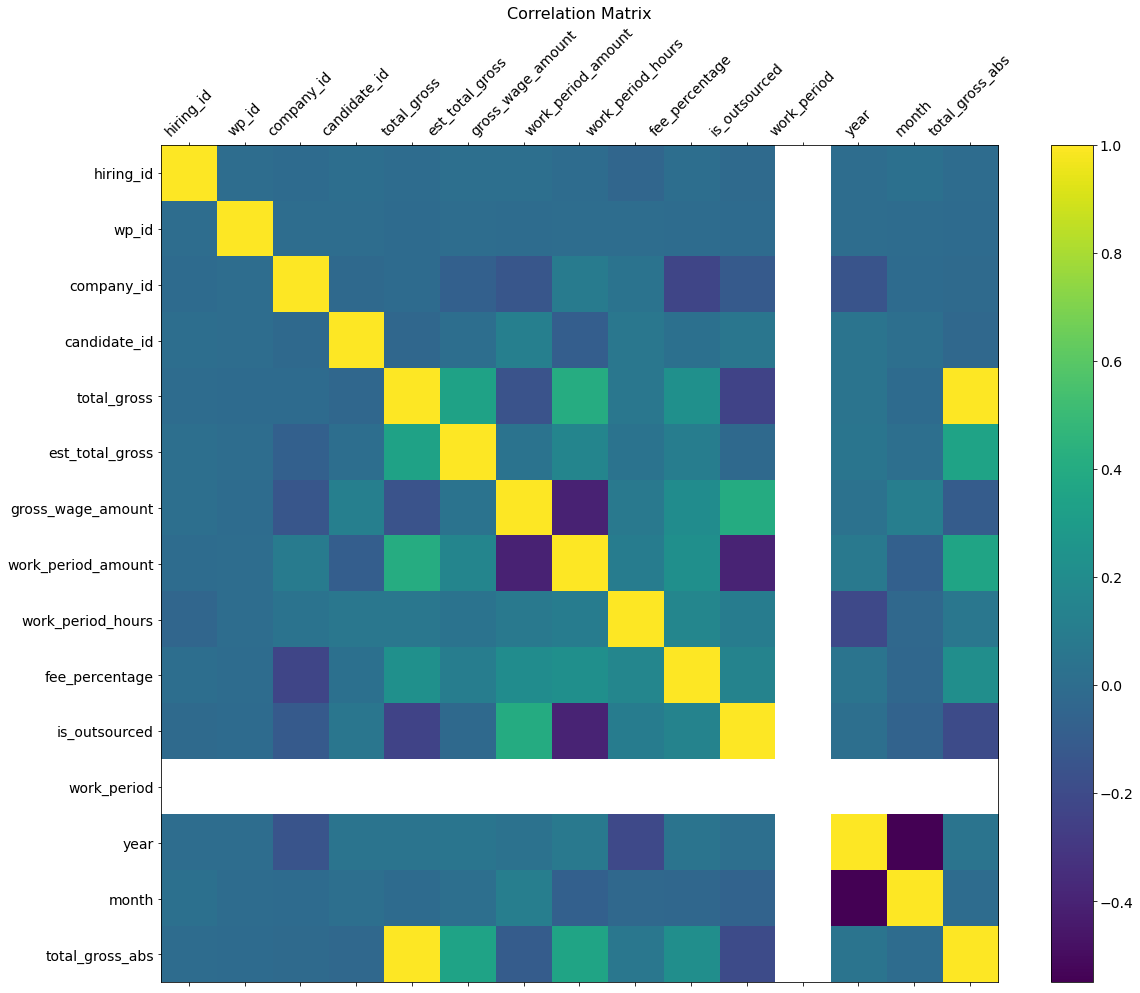

In [25]:
# Looking for correlations between numerical variables. There are no much correlation between any pair of variables 
# beyond the logical ones.

f = plt.figure(figsize=(19, 15))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [26]:
# Question: Any particular pattern among the salary values? We're going to analyze total_gross_abs since thre different
# perspectives: job function, company_name and time period.

grouped_job = data.groupby('job_function').mean()
grouped_company = data.groupby('company_name').mean()
grouped_date = data.groupby('dateInt').mean()

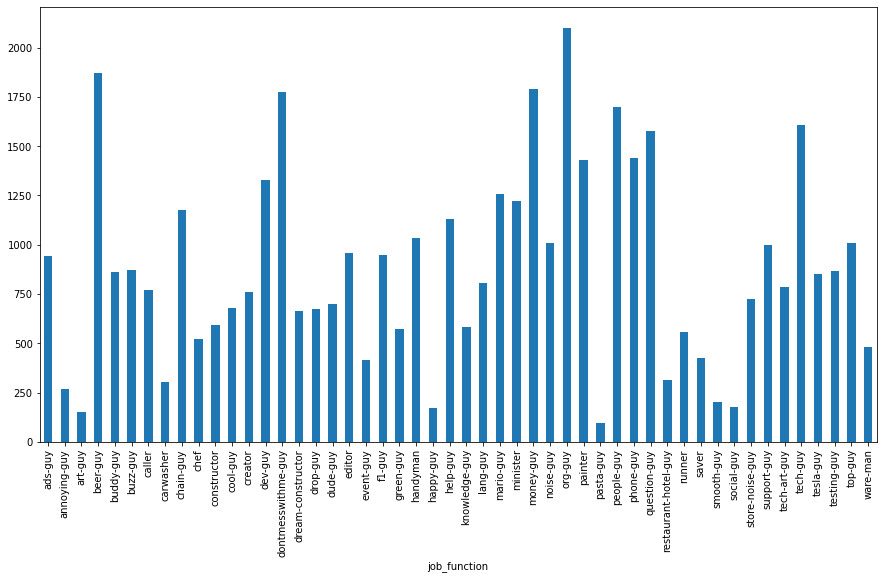

In [27]:
grouped_job["total_gross_abs"].plot(kind = "bar")
plt.show()

In [28]:
# The top-five jobs with the highest total_gross_abs are these guys

grouped_job.nlargest(5,['total_gross_abs'])

,hiring_id,wp_id,company_id,candidate_id,total_gross,est_total_gross,issue_reported,gross_wage_amount,work_period_amount,work_period_hours,fee_percentage,is_outsourced,year,month,total_gross_abs
job_function,,,,,,,,,,,,,,,
org-guy,756912.000000,4.565384e+06,2.105367e+08,5.783149e+07,2102.043333,2041.666667,0.000000,225000.000000,30.400000,40.000000,1.700000,NaN,2017.000000,11.000000,2102.043333
beer-guy,601219.666667,4.865739e+06,2.028517e+08,5.175684e+07,1870.279091,1861.162648,0.030303,183686.090909,5.821212,39.515152,6.081097,NaN,2017.212121,4.969697,1870.279091
money-guy,610240.763158,3.460661e+06,2.997820e+08,5.060456e+07,1790.807351,1656.104842,0.000000,187087.578947,12.662105,35.236842,2.177363,NaN,2017.184211,6.789474,1790.807351
dontmesswithme-guy,413605.294118,4.032266e+06,2.322606e+08,5.139476e+07,1775.641176,1785.962706,0.000000,190525.470588,4.129412,38.823529,1.582918,NaN,2017.470588,4.941176,1775.641176
people-guy,488676.008696,4.194020e+06,2.096923e+08,5.757354e+07,1701.403491,1702.172780,0.004348,175820.621739,38.381130,37.445652,2.185479,NaN,2017.921739,2.900000,1701.403491


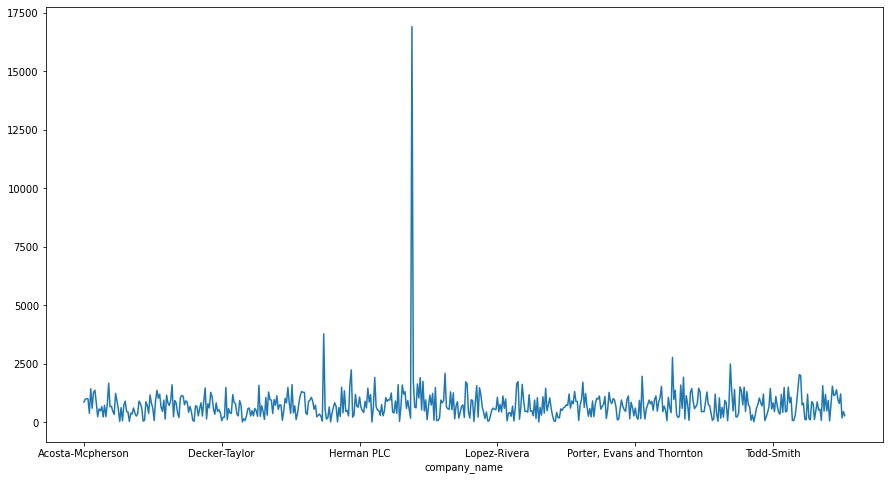

In [28]:
grouped_company["total_gross_abs"].plot()
plt.show()

In [40]:
# Which are the companies with the highest total_gross_abs? Jackson, Hurst and Stout have a big difference compared to the rest

grouped_company.nlargest(5,['total_gross_abs'])

,hiring_id,wp_id,company_id,candidate_id,total_gross,est_total_gross,issue_reported,gross_wage_amount,work_period_amount,work_period_hours,fee_percentage,is_outsourced,year,month,total_gross_abs
company_name,,,,,,,,,,,,,,,
"Jackson, Hurst and Stout",236995.000000,5.335770e+06,503850622.0,5.783632e+07,14327.609105,28534.008210,0.500000,55000.0,12.000000,40.000,8.000000,NaN,2017.000000,12.000000,16906.578744
"Griffin, Myers and Jones",522184.373333,3.992672e+06,62807308.0,5.778044e+07,3202.464502,34619.578831,0.920000,66720.0,12.000000,40.000,10.000000,NaN,2017.373333,7.853333,3778.908113
Rivera-Wagner,541786.444444,4.719075e+06,92500299.0,5.668149e+07,2772.107778,2733.649333,0.111111,292891.0,6.888889,40.000,1.646244,NaN,2017.000000,6.111111,2772.107778
Smith Inc,854425.750000,1.848082e+06,10966923.0,1.447996e+07,2487.538500,2249.995000,0.000000,245454.0,4.575000,37.625,6.000000,NaN,2017.000000,8.000000,2487.538500
"Hayden, Luna and Pace",373823.000000,5.815201e+06,282352962.0,4.713265e+07,2239.440000,2285.142857,0.000000,1333.0,3.000000,40.000,8.000000,NaN,2017.000000,5.000000,2239.440000


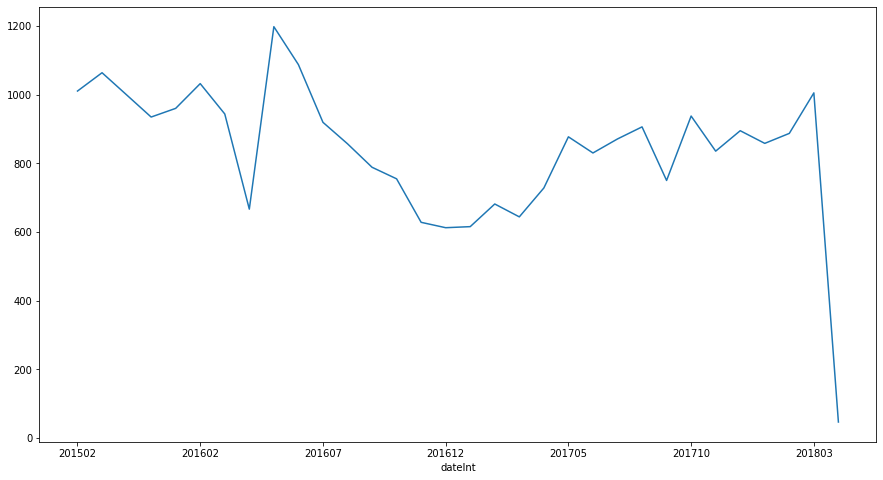

In [35]:
# The total_gross_abs by period time seems stable across the different seasons with a slight descent in 2016 and a steep fall in
# March, 2018, maybe due to lack of data or some real problem, we should study it deeper


grouped_date["total_gross_abs"].plot()
plt.show()

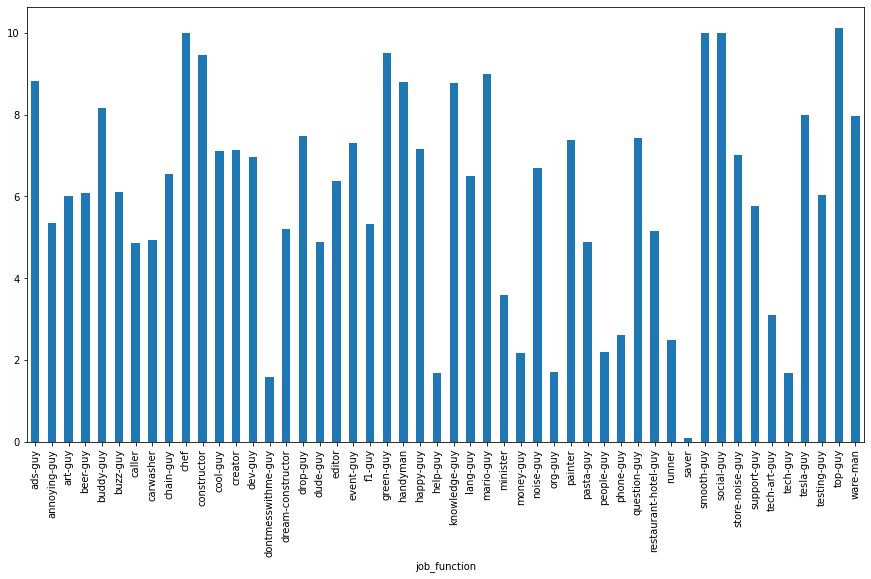

In [36]:
# Question: Any interesting relation between the fee_percentage and the job_function or company? Well, there are some
# profiles that barely has fee_percentage, like the dontmesswithmeguy (maybe the name has something to do), the help-guy and the saver

grouped_job["fee_percentage"].plot(kind = "bar")
plt.show()

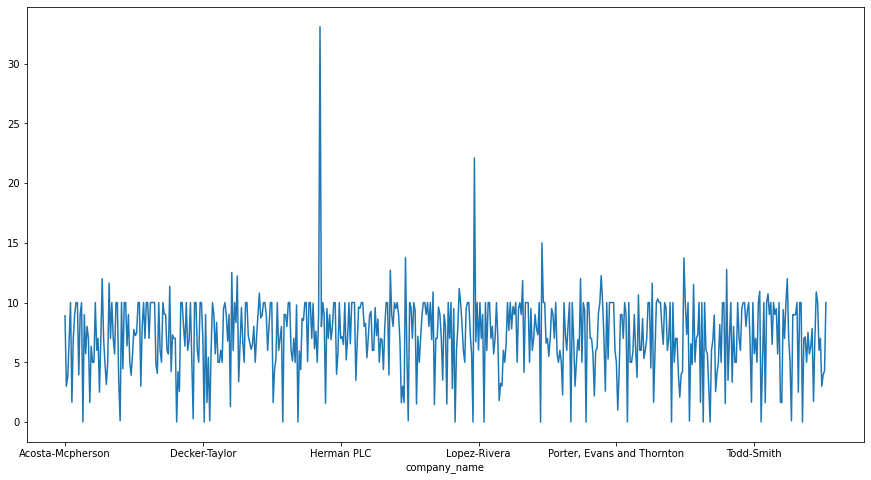

In [38]:
grouped_company["fee_percentage"].plot()
plt.show()

In [42]:
# Top 5 of highest fee_percentage companies:

grouped_company.nlargest(5,['fee_percentage'])

,hiring_id,wp_id,company_id,candidate_id,total_gross,est_total_gross,issue_reported,gross_wage_amount,work_period_amount,work_period_hours,fee_percentage,is_outsourced,year,month,total_gross_abs
company_name,,,,,,,,,,,,,,,
"Harmon, Stephens and Ruiz",608882.000000,3.534646e+06,185636813.0,5.600627e+07,626.176667,643.504622,0.133333,98982.200000,3.2,36.8,33.084177,NaN,2017.0,3.600000,626.176667
"Lopez, Alexander and Williams",445377.250000,3.221618e+06,2975809.0,5.246607e+07,605.044167,551.704762,0.000000,658.416667,2.8,40.0,22.100000,NaN,2017.0,7.416667,605.044167
Moon PLC,438970.000000,8.304860e+05,276864277.0,2.910382e+07,483.000000,598.538978,0.000000,1200.000000,10.0,40.0,15.000000,NaN,2017.0,6.000000,569.940000
Johnson and Sons,604636.000000,5.415068e+06,239161741.0,5.772758e+07,403.860000,599.162074,0.000000,1001.000000,13.0,48.0,13.770000,NaN,2017.0,6.000000,476.554800
Ryan-Costa,477014.666667,4.977724e+06,98173984.0,5.658512e+07,392.474146,491.804947,0.666667,994.444444,12.0,40.0,13.735556,NaN,2018.0,1.888889,463.119493


In [96]:
# Confirming with statistics our perception of cancelled contracts due to business_model. These are categorical variables, so
# instead of calculating correlations we need to compute crosstab tables and apply the chi-squared test of independance.

pd.crosstab(data.hiring_status, data.business_model)

business_model,independent_contractor,staffing_agency
hiring_status,,
hiring_cancelled,21,4770
hiring_closed_out,1095,3606
pending_cancellation,18,127
ready_to_work,2835,6297


In [97]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(data.hiring_status, data.business_model))

(1788.2866743660313,
 0.0,
 3,
 array([[1013.13223933, 3777.86776067],
        [ 994.100325  , 3706.899675  ],
        [  30.66252864,  114.33747136],
        [1931.10490703, 7200.89509297]]))

In [98]:
# p-value (the second value) is less than 0.05, we, therefore, can reject the null hyphotesis that the variables are independents

